### MOST POPULAR TAGS

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
closeData=pd.read_csv("tagCount5Reasons.csv") #5 reasons for closure(including duplicate)
openData=pd.read_csv("tagWithOpenCount.csv")

In [25]:
closeData.shape

(26709, 3)

In [26]:
openData.shape

(54126, 3)

In [27]:
mostPopularTags=closeData.merge(openData,how="outer")
print(mostPopularTags.head())
print(mostPopularTags.shape)

   TagId  countOfQuesClosed     TagName  countOfQuesStillOpen
0      1             9480.0        .net              263882.0
1      2            42206.0        html              747022.0
2      3            83529.0  javascript             1645699.0
3      4            28584.0         css              535258.0
4      5            68799.0         php             1160245.0
(54168, 4)


In [28]:
mostPopularTags[mostPopularTags['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
26709,26,NaN,j#,57.0


In [29]:
mostPopularTags.replace(np.nan,0,inplace=True)

In [30]:
mostPopularTags[mostPopularTags['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
26709,26,0.0,j#,57.0


In [31]:
mostPopularTags['totalCount']=mostPopularTags['countOfQuesClosed']+mostPopularTags['countOfQuesStillOpen']

In [32]:
mostPopularTags.sort_values(by=['totalCount'],ascending=False,inplace=True)

In [33]:
mostPopularTags.head()

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen,totalCount
2,3,83529.0,javascript,1645699.0,1729228.0
11,17,90416.0,java,1392180.0,1482596.0
6,9,56998.0,c#,1202173.0,1259171.0
4,5,68799.0,php,1160245.0,1229044.0
662,1386,35018.0,android,1117943.0,1152961.0


In [34]:
top=25
labels=mostPopularTags['TagName'].iloc[0:top]
#print(labels)
indices=[i for i in range(1,top+1)]
#print(indices)
total=np.array(mostPopularTags['totalCount'].iloc[0:top] )
print(total)

[1729228. 1482596. 1259171. 1229044. 1152961. 1086512.  929811.  789228.
  588627.  580950.  563842.  538817.  469608.  337764.  299776.  287142.
  282023.  280950.  273362.  270081.  257839.  255905.  251134.  248779.
  218649.]


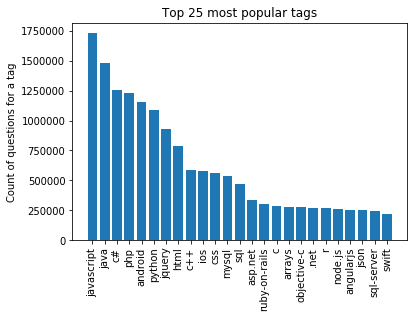

In [35]:
#plt.figure(figsize=(12, 6))
plt.bar(indices,total,align='center')
plt.ylabel("Count of questions for a tag")
plt.title("Top "+str(top)+" most popular tags") #open and closed together
plt.xticks(indices, labels)
plt.xticks(rotation=90)
plt.show()
#plt.savefig('D:\SAJAL\\foo.png')

### MOST CLOSED

In [36]:
mostPopularTags.sort_values(by=['countOfQuesClosed'],ascending=False,inplace=True)

In [37]:
mostPopularTags.head()

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen,totalCount
11,17,90416.0,java,1392180.0,1482596.0
2,3,83529.0,javascript,1645699.0,1729228.0
4,5,68799.0,php,1160245.0,1229044.0
10,16,63254.0,python,1023258.0,1086512.0
6,9,56998.0,c#,1202173.0,1259171.0


In [38]:
top=25
labels=mostPopularTags['TagName'].iloc[0:top]
#print(labels)
indices=[i for i in range(1,top+1)]
#print(indices)
total=np.array(mostPopularTags['countOfQuesClosed'].iloc[0:top] )
print(total)

[90416. 83529. 68799. 63254. 56998. 42206. 40817. 35018. 32041. 28584.
 26604. 24332. 20856. 18580. 18273. 17610. 14605. 11913. 10612. 10389.
 10351.  9656.  9480.  8286.  8261.]


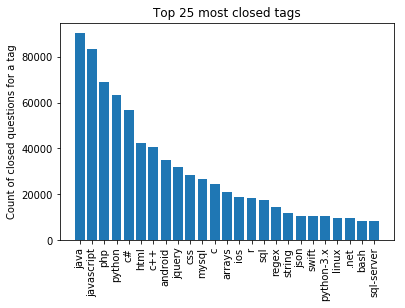

In [39]:
#plt.figure(figsize=(12, 6))
plt.bar(indices,total,align='center')
plt.ylabel("Count of closed questions for a tag")
plt.title("Top "+str(top)+" most closed tags")
plt.xticks(indices, labels)
plt.xticks(rotation=90)
plt.show()
#plt.savefig('D:\SAJAL\\foo.png')

### MOST OPEN

In [40]:
mostPopularTags.sort_values(by=['countOfQuesStillOpen'],ascending=False,inplace=True)

In [41]:
mostPopularTags.head()

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen,totalCount
2,3,83529.0,javascript,1645699.0,1729228.0
11,17,90416.0,java,1392180.0,1482596.0
6,9,56998.0,c#,1202173.0,1259171.0
4,5,68799.0,php,1160245.0,1229044.0
662,1386,35018.0,android,1117943.0,1152961.0


In [42]:
top=25
labels=mostPopularTags['TagName'].iloc[0:top]
#print(labels)
indices=[i for i in range(1,top+1)]
#print(indices)
total=np.array(mostPopularTags['countOfQuesStillOpen'].iloc[0:top] )
print(total)

[1645699. 1392180. 1202173. 1160245. 1117943. 1023258.  897770.  747022.
  562370.  547810.  535258.  512213.  451998.  329674.  295513.  272944.
  263882.  262810.  261167.  251808.  250524.  250412.  240522.  240518.
  209781.]


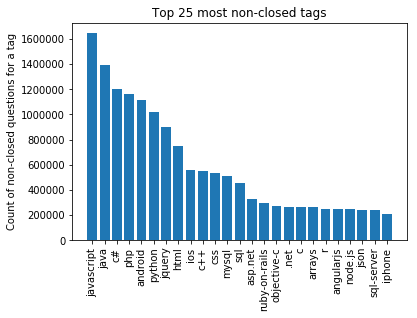

In [43]:
#plt.figure(figsize=(12, 6))
plt.bar(indices,total,align='center')
plt.ylabel("Count of non-closed questions for a tag")
plt.title("Top "+str(top)+" most non-closed tags")
plt.xticks(indices, labels)
plt.xticks(rotation=90)
plt.show()
#plt.savefig('D:\SAJAL\\foo.png')

In [44]:
# These plots shows that some tags such as Java, Javascript, C#, php, python etc are the most 
# commonly used tags and have high presence in closed as well as in open questions. Hence, we can't directly take 
# into account the count of closed questions for a tag as a feature for closure and need another metric 
# to account for the proportion of closed and open questions for a tag. Hence, we calculate the ratio of count of closed
# questions to that of open questions for each tag as a feature.